In [41]:
import pandas as pd
import numpy as np

file_dataset = '../data/raw/cryptocurrencypricehistory/ethereum_dataset.csv'
file_price = '../data/raw/cryptocurrencypricehistory/ethereum_price.csv'
nrows = 1000 # limit of rows to make preview

Loading data.

In [42]:
dataset = pd.read_csv(file_dataset,
          # nrows=nrows,
            index_col=0,
            parse_dates=True)

price = pd.read_csv(file_price,
          # nrows=nrows,
            index_col=0,
            dtype={'Volume':'int','Market Cap':'string'},
            thousands=',',
            na_values='-',
            parse_dates=True)

In [43]:
dataset.describe()

,UnixTimeStamp,eth_etherprice,eth_tx,eth_address,eth_supply,eth_marketcap,eth_hashrate,eth_difficulty,eth_blocks,eth_uncles,eth_blocksize,eth_blocktime,eth_gasprice,eth_gaslimit,eth_gasused,eth_ethersupply,eth_chaindatasize,eth_ens_register
count,7.690000e+02,769.000000,769.000000,7.690000e+02,7.690000e+02,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,7.690000e+02,7.690000e+02,7.690000e+02,769.000000,0.0,125.000000
mean,1.471392e+09,46.920806,70564.308192,1.050655e+06,8.320820e+07,4301.621649,13247.782131,233.619406,5517.196359,429.973992,2770.429129,15.707763,3.922550e+10,3.993699e+06,3.129846e+09,29182.658891,NaN,1301.024000
std,1.919250e+07,90.378356,89424.024060,1.521229e+06,6.753548e+06,8451.186405,22419.039496,455.312190,627.739112,160.668231,3457.027985,2.158544,5.545561e+10,1.285138e+06,4.580532e+09,3352.671936,NaN,839.253129
min,1.438214e+09,0.000000,0.000000,9.205000e+03,7.204931e+07,0.000000,23.756900,0.121000,3383.000000,126.000000,575.000000,4.460000,0.000000e+00,0.000000e+00,0.000000e+00,17380.937500,NaN,0.000000
25%,1.454803e+09,2.520000,17549.000000,5.892500e+04,7.715399e+07,193.763321,672.601500,11.176000,5046.000000,351.000000,1200.000000,14.160000,2.264193e+10,3.141700e+06,6.648190e+08,26694.531250,NaN,581.000000
50%,1.471392e+09,10.970000,42346.000000,5.394280e+05,8.308015e+07,921.391838,4362.965300,60.393000,5861.000000,403.000000,1531.000000,14.670000,2.394373e+10,4.012114e+06,1.362771e+09,30819.843750,NaN,1267.000000
75%,1.487981e+09,14.990000,58756.000000,1.081093e+06,8.922728e+07,1248.461400,10123.880000,142.922000,6035.000000,464.000000,2045.000000,16.890000,5.231352e+10,4.711458e+06,2.573096e+09,31808.593750,NaN,1971.000000
max,1.504570e+09,394.660000,444413.000000,7.067860e+06,9.445146e+07,36641.699754,95055.985800,2250.289000,6912.000000,2044.000000,19760.000000,25.530000,9.395883e+11,6.722669e+06,2.325272e+10,39316.093750,NaN,3863.000000


In [44]:
price.describe()

,Open,High,Low,Close,Volume
count,761.000000,761.000000,761.000000,761.000000,7.610000e+02
mean,49.895319,52.372998,47.483389,50.287726,1.776451e+08
std,94.701419,99.021937,90.028103,95.157500,4.208592e+08
min,0.431589,0.482988,0.420897,0.434829,1.021280e+05
25%,4.360000,4.770000,4.030000,4.400000,5.173420e+06
50%,11.110000,11.340000,10.750000,11.080000,1.397150e+07
75%,17.360000,18.880000,16.370000,17.600000,5.558060e+07
max,397.590000,414.760000,383.470000,401.490000,2.882650e+09


We observe that dataset has gabs on price. We try to combine with price file.
As is unkonwn witch is the price of reference we try Close price because it seem the most similar of each.

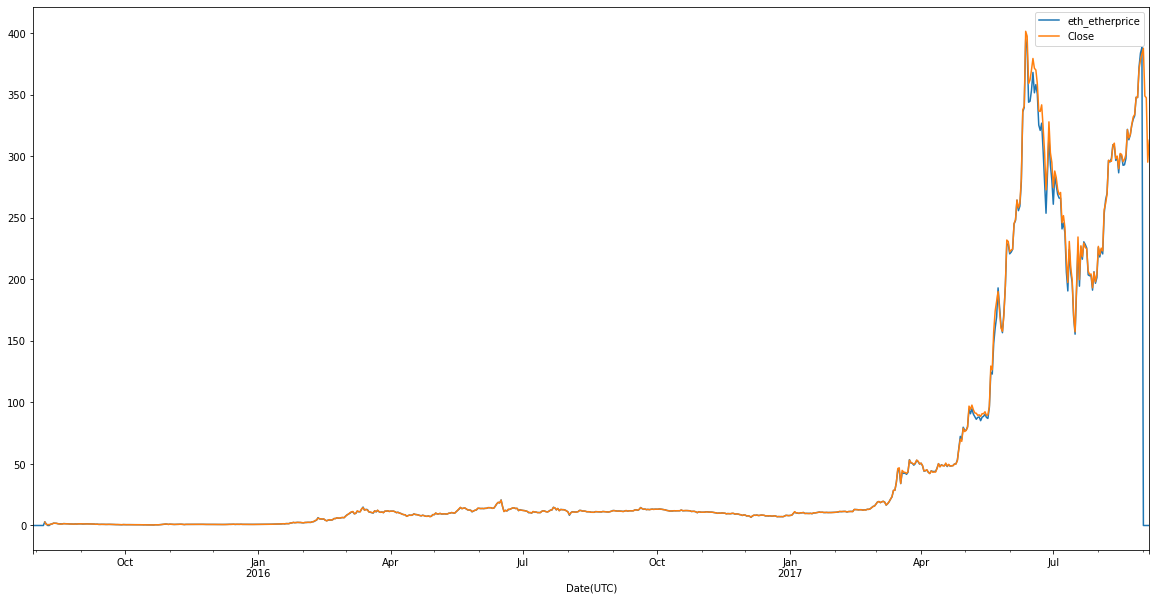

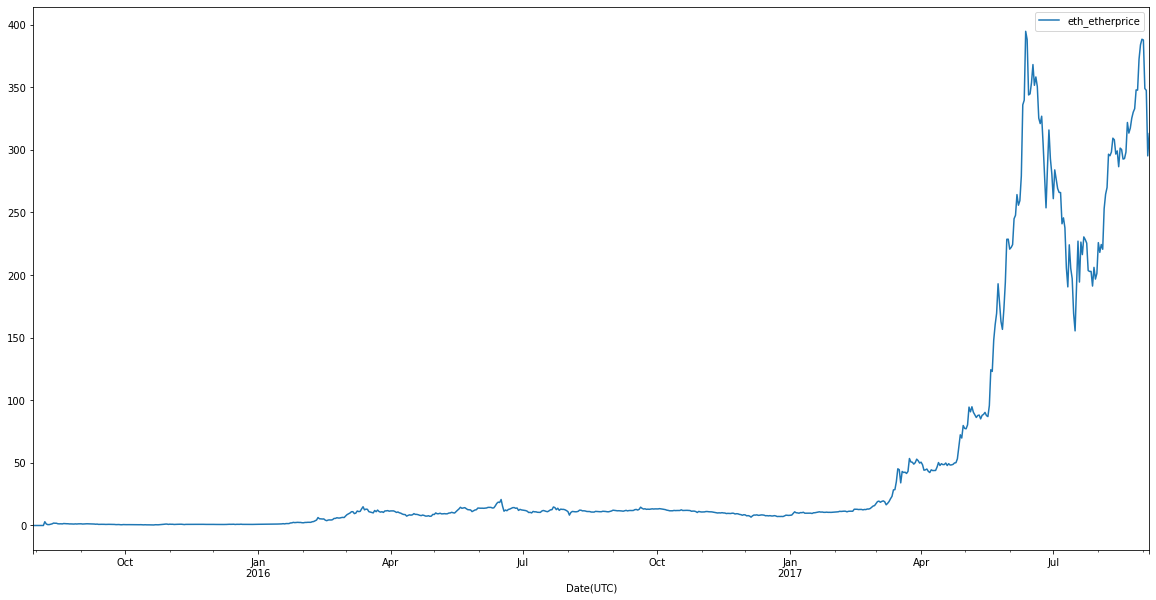

In [45]:
join  = dataset.join(price['Close'])

join.plot.line( y=['eth_etherprice','Close'], figsize=(20,10))

join['eth_etherprice'] = join.apply( lambda row: row['eth_etherprice'] if (row['eth_etherprice']!=0 or pd.isnull(row['Close'])) else row['Close'], axis=1)

join.drop(['Close'],axis=1)
join.plot.line( y=['eth_etherprice'], figsize=(20,10))

dataset['eth_etherprice'] = join['eth_etherprice']


Market capital alse have some gaps.
We e cang get from prices file but this is en other scale, for this we need to divide for 1M.


In [46]:
price['Market Cap'] = price['Market Cap'].apply(lambda x :  int(x.replace(',',''))/1000000 if isinstance(x, str) else 0 )

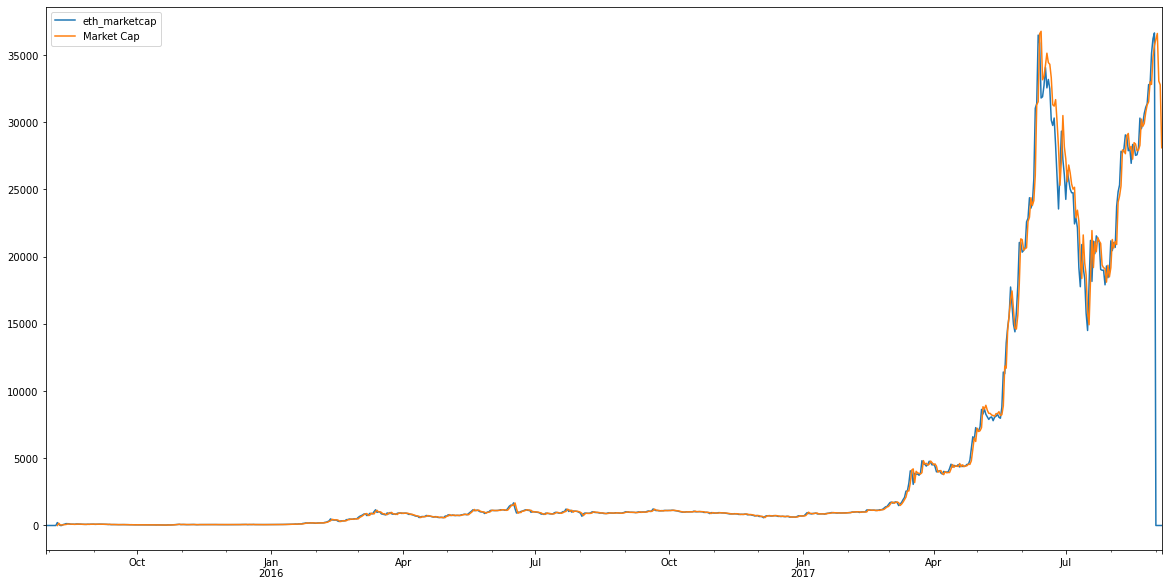

In [47]:
join = dataset.join(price['Market Cap'], how='outer')
join.plot.line( y=['eth_marketcap','Market Cap'], figsize=(20,10))

Set gap values to eth_marketcap from Market Cap

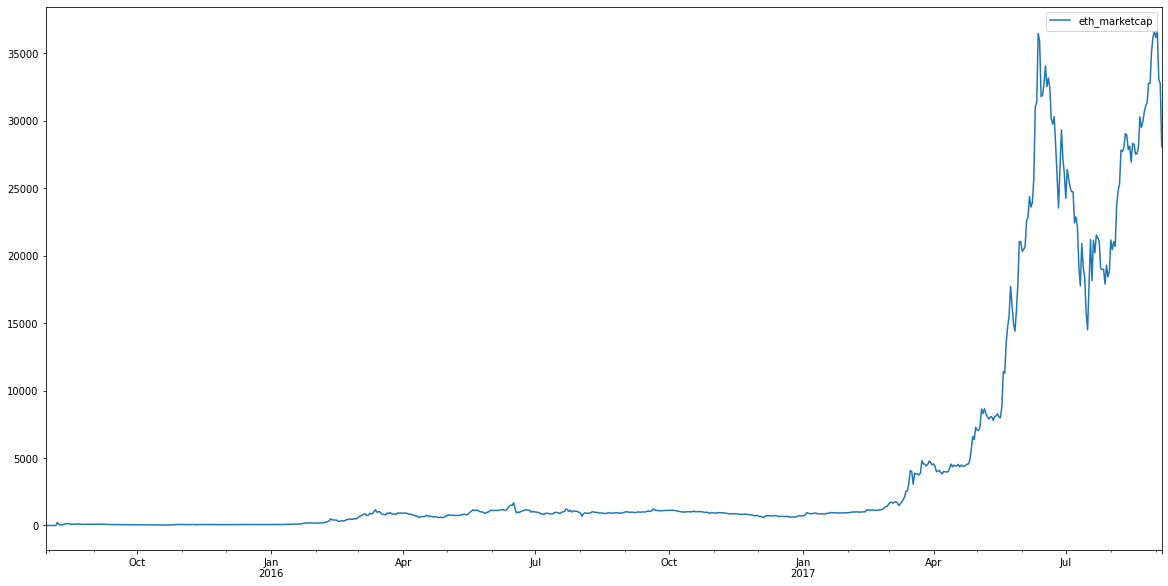

In [48]:
join['eth_marketcap'] = join.apply( lambda row: row['eth_marketcap'] if (row['eth_marketcap']!=0 or pd.isnull(row['Market Cap'])) else row['Market Cap'], axis=1)
join.plot.line( y=['eth_marketcap'], figsize=(20,10))
join.drop(['Market Cap'],axis=1)
dataset['eth_marketcap'] = join['eth_marketcap']

Finally, we save a file with datasetfile with revised data.

In [49]:
dataset.to_csv("../data/processed/etherum_dataset.csv")







